# Contando bolhas

Autor: Almir Soares Firmo Filho

O objetivo deste notebook é mostrar como contar objetos do tipo bolha em uma imagem. Porém, é necessário fazer algumas ponderações antes:

- As bolhas que encostarem nas bordas da imagem devem ser excluídas da contagem, pois não temos informações concretas sobre todo o objeto;

- Para contar o número de bolhas nós podemos criar uma variável auxiliar que será associada à posição do primeiro pixel da bolha ou podemos pintar a própria bolha com um tom de cinza incrementado do valor das bolhas precendentes. No caso da imagem conter mais de 255 bolhas é possível pintá-las com um valor inteiro (32 bits) ao invés de char (8 bits);

- Para pintar as bolhas utilizaremos o algoritmo floodfill do OpenCV, que pinta pixels vizinhos com um determinado tom (passo à função via argumento).

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import cv2
import matplotlib.pyplot as plt

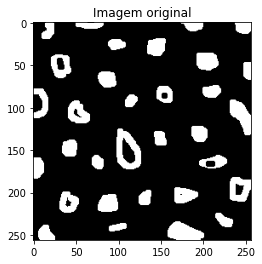

Dimensões da imagem:  (256, 256)


In [2]:
# Carregar imagem original
image = cv2.imread('bolhas.png', cv2.IMREAD_GRAYSCALE)

# Exibir imagem original
plt.title('Imagem original')
plt.imshow(image,'gray')
plt.show()

print("Dimensões da imagem: ",image.shape)

# Extrair a informação de altura e largura da imagem
h, w = image.shape[:2]

Para excluir as bolhas na borda iremos percorrer a primeira e a última linha fazendo floodfill com a cor do fundo (preto) ao encontrar um pixel branco. Faremos o mesmo na primeira e última coluna:

In [3]:
# Cria uma cópia da imagem original
sem_bordas = image.copy()

# Percorre imagem excluindo bolhas nas bordas
for i in range(h):
    for j in range(w):
        if i==0 or i==h-1:
            if image[i,j] == 255:
                cv2.floodFill(sem_bordas, None, (j,i), 0)

for i in range(h):
    for j in range(w):
        if j==0 or j==h-1:
            if image[i,j] == 255:
                cv2.floodFill(sem_bordas, None, (j,i), 0)

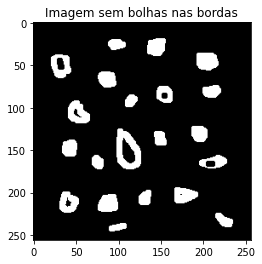

In [4]:
# Exibir imagem sem bolhas nas bordas
plt.title('Imagem sem bolhas nas bordas')
plt.imshow(sem_bordas,'gray')
plt.show()

Agora que temos apenas bolhas que não tocam as bordas, calcularemos a quantidade de bolhas da seguinte forma:

- Percorreremos a imagem pixel à pixel;

- Ao encontrar um pixel branco faremos floodfill com um tom de cinza incrementado em 0.5 do valor anterior (valor inicial é o próprio 0.5);

- Ao terminar de percorrer a imagem faremos:

$$numBolhas = \frac{TomCinza}{incremento}$$

In [5]:
cont_bolhas = sem_bordas.copy()

num_obj = 0
for i in range(h):
    for j in range(w):
        if cont_bolhas[i,j] == 255:
            num_obj += 1
            cv2.floodFill(cont_bolhas, None, (j,i), num_obj)

num_bolhas = int(num_obj/1)
print('Número de bolhas = ', num_bolhas)

Número de bolhas =  21


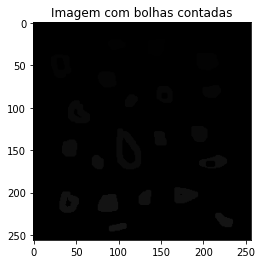

In [6]:
# Exibir imagem com bolhas contadas
plt.title('Imagem com bolhas contadas')
plt.imshow(cont_bolhas,'gray', vmin=0, vmax=255)
plt.show()

# É importante ressaltar que a biblioteca matplotlib faz uma espécie de equalização de histograma quando não se usa os atributos
# vmin e vmax na função 'imshow'

Por fim, para contar o número de bolhas com e sem buraco, iremos fazer o seguinte procedimento:

- Floodfill no primeiro pixel da imagem com o tom branco para mudar a cor do fundo da imagem;

- Percorrer a imagem inteira e ao encontrar um pixel com um determinado tom procurar algum vizinho com tom preto e, caso encontre, incrementar o contador de bolhas com buraco e pintar o pixel inicial com a cor preta (deste modo, mesmo que haja mais de um buraco na bolha ela só vai ser contabilizada uma vez);

- Subtrair o número de bolhas do número de bolhas com buraco para encontrar o número de bolhas sem buraco.

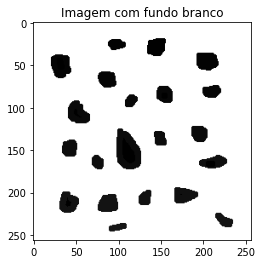

In [7]:
def encontrar_buracos(image, x, tom):
    h, w = image.shape[:2]
    for i in range(x,h):
        for j in range(w):
            if image[i,j] == gray_tone and image[i,j+1] == 0:
                return 1
    return 0

cont_bolhas2 = cont_bolhas.copy()

# Floodfill com a cor branca no primeiro pixel da imagem (mudar a cor do fundo)
cv2.floodFill(cont_bolhas2, None, (0,0), 255)

# Exibir imagem com fundo branco
plt.title('Imagem com fundo branco')
plt.imshow(cont_bolhas2,'gray', vmin=0, vmax=255)
plt.show()

In [8]:
# Criar variável para contar número de bolhas com buraco
num_bolhas_c_buraco = 0
gray_tone = 0

for i in range(h):
    for j in range(w):
        if cont_bolhas2[i,j] > 0 and cont_bolhas2[i,j] < 255:
            # Anota o tom de cinza encontrado
            gray_tone = cont_bolhas2[i,j]
            # Procura um pixel vizinho ao tom de cinza que seja preto (um buraco)
            num_bolhas_c_buraco += encontrar_buracos(cont_bolhas2, i, gray_tone)
            # Pinta a bolha de preto para evitar que ela seja recontada
            cv2.floodFill(cont_bolhas2, None, (j,i), 0)
            
num_bolhas_s_buraco = num_bolhas - num_bolhas_c_buraco

print('Número de bolhas sem buraco: ', num_bolhas_s_buraco)
print('Número de bolhas com buraco: ', num_bolhas_c_buraco)

Número de bolhas sem buraco:  14
Número de bolhas com buraco:  7
